#  Graduate Admissions

## Regression analysis using random forest

In [1]:
import warnings
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

### Importing data

In [2]:
df = pd.read_pickle(r'C:\Users\nishi\Desktop\df.pkl')

In [3]:
df.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Features
- gre_score
- toefl_score
- university_rating
- sop
- lor
- cgpa
- research

### Target
- chance_of_admit

### Splitting the data for training and testing
- Train the model with 90% of data
- Test against remaining 10%

In [4]:
from sklearn.model_selection import train_test_split

features = df.drop(['chance_of_admit'], axis = 1)
labels = df[['chance_of_admit']]
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.10, random_state = 42)

### Training a random forest

In [5]:
%%time
rf = RandomForestRegressor()
rf.fit(train_features, train_labels.values.ravel())

Wall time: 23.5 ms


### Predicting the testing data

In [6]:
prediction = rf.predict(test_features)
result = test_features.copy()
result['actual_chance_of_admit'] = test_labels[['chance_of_admit']]
result['predicted_chance_of_admit'] = prediction
result['difference'] = abs(result['predicted_chance_of_admit']-result['actual_chance_of_admit'])

In [7]:
result.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,actual_chance_of_admit,predicted_chance_of_admit,difference
361,334,116,4,4.0,3.5,9.54,1,0.93,0.940,0.010
73,314,108,4,4.5,4.0,9.04,1,0.84,0.796,0.044
374,315,105,2,2.0,2.5,7.65,0,0.39,0.611,0.221
155,312,109,3,3.0,3.0,8.69,0,0.77,0.712,0.058
104,326,112,3,3.5,3.0,9.05,1,0.74,0.811,0.071


###  Coefficient of determination R^2 of the prediction
- The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) \** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()
- best possible score is 1.0
- it can be negative (because the model can be arbitrarily worse)

In [8]:
rf.score(test_features,test_labels)

0.7958951346725888

### Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:


\begin{equation*}
\sqrt{\frac1n\sum_{i=1}^n (y_{true} - y_{pred})^2}
\end{equation*}

In [9]:
print(np.sqrt(metrics.mean_squared_error(test_labels, prediction)))

0.0693439254729641


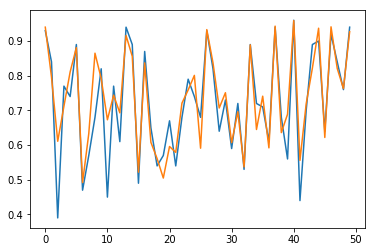

In [10]:
plt.plot(test_labels.values.ravel(), '-', prediction, '-')

In [11]:
result[['actual_chance_of_admit','predicted_chance_of_admit','difference']].to_csv(r'C:\Users\nishi\Desktop\RF.csv', index=False, header = ['Chance of Admit','Predicted','Delta'])

In [13]:
output_error = test_labels.values - prediction

error_lin_reg = np.mean(np.abs(output_error))
accuracy_lin_reg = (1 - error_lin_reg) * 100

print("Test Accuracy " + str(round(accuracy_lin_reg,2)) + "%")

Test Accuracy 83.35%
